# Lab04_523H0164



## Import libraries and useful function


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image", student_id="523H0164"):
    img_to_show = image.copy()

    font_scale = max(image.shape[1] / 500, 0.5)
    thickness = max(int(font_scale * 2), 2)
    margin = int(image.shape[1] * 0.015)
    position = (margin, image.shape[0] - margin)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    roi_y_start = image.shape[0] - int(image.shape[0] * 0.1)
    roi_x_end = int(image.shape[1] * 0.4)
    corner_roi = image[roi_y_start:, :roi_x_end]

    if len(corner_roi.shape) == 3 and corner_roi.shape[2] == 3:
        gray_roi = cv2.cvtColor(corner_roi, cv2.COLOR_BGR2GRAY)
        mean_intensity = np.mean(gray_roi)
    else:
        mean_intensity = np.mean(corner_roi)

    text_color = (0, 0, 0) if mean_intensity > 127 else (255, 255, 255)

    cv2.putText(img_to_show, student_id, position, font, font_scale, text_color, thickness)

    if len(img_to_show.shape) == 3 and img_to_show.shape[2] == 3:
        img_to_display = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_to_display)
    else:
        plt.imshow(img_to_show, cmap='gray')

    plt.title(title)
    plt.axis('off')
    plt.show()

### Exercise 1: Image binarization

Using thresholding techniques to convert the grayscale sudoku image into a binary image. Choose the method that gives the best-looking result.

**Analysis:** The sudoku image has uneven lighting, so `Adaptive Thresholding` is the best choice.

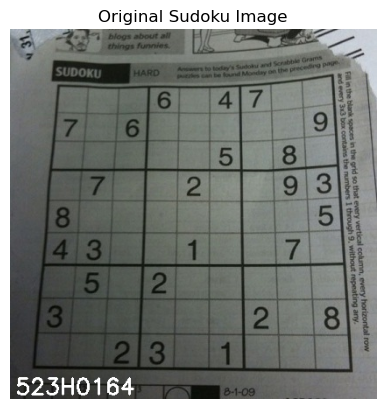

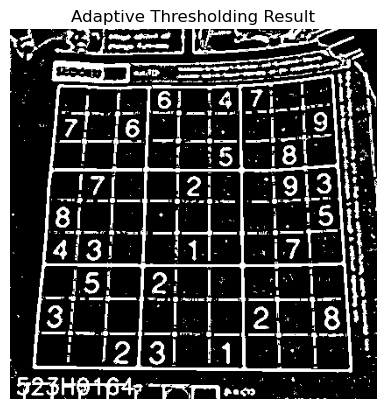

In [13]:
# Load the image and convert to grayscale
img_sudoku = cv2.imread('sudoku.png')
img_sudoku_gray = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2GRAY)

# Apply blurring to reduce noise
img_sudoku_blur = cv2.medianBlur(img_sudoku_gray, 5)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    img_sudoku_blur, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, # Invert to get black numbers on a white background
    11, 
    2
)

# Display the original image and the result
display_image(img_sudoku, title="Original Sudoku Image")
display_image(adaptive_thresh, title="Adaptive Thresholding Result")

### Exercise 2: Number bounding-box

Using morphological operations and contours to draw a rectangle surrounding each *number* (composed of multiple digits).

**Hint:**
1. Convert to a binary image.
2. Use `dilation` to connect the digits of each number into a single blob.
3. Find contours and draw the bounding boxes.

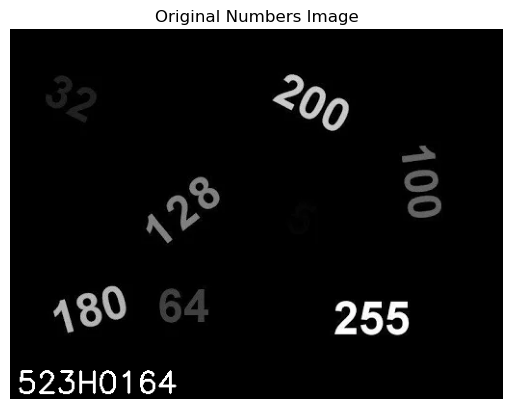

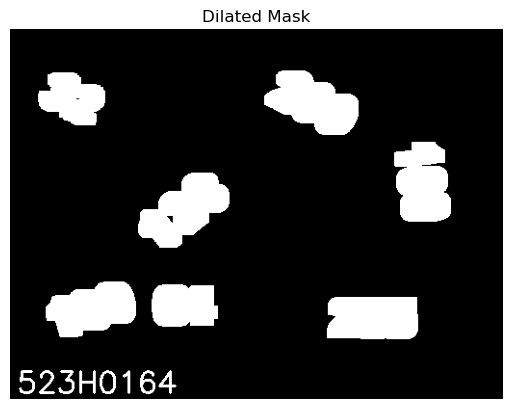

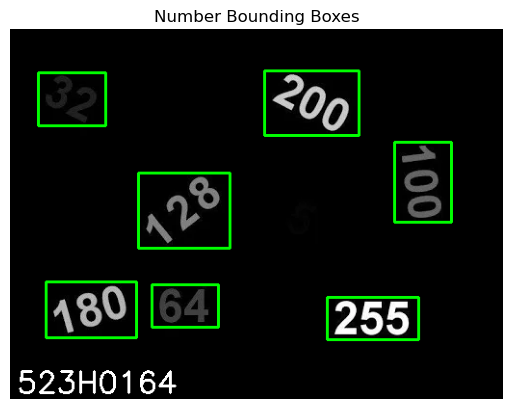

In [14]:
# Load the original and grayscale images
img_numbers_color = cv2.imread('numbers.png')
img_numbers_gray = cv2.cvtColor(img_numbers_color, cv2.COLOR_BGR2GRAY)

# Step 1: Threshold to create a binary mask
_, mask = cv2.threshold(img_numbers_gray, 30, 255, cv2.THRESH_BINARY)

# Step 2: Use dilation to connect the digits
# A wide rectangular kernel helps connect digits horizontally
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
dilated_mask = cv2.dilate(mask, kernel, iterations=2)

# Step 3: Find contours and draw bounding boxes
contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_ex2 = img_numbers_color.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output_ex2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the steps and the final result
display_image(img_numbers_color, title="Original Numbers Image")
display_image(dilated_mask, title="Dilated Mask")
display_image(output_ex2, title="Number Bounding Boxes")

### Exercise 3: Digit bounding-box

Using morphological operations and contours to draw a rectangle surrounding each *individual digit*.

**Hint:**
1. Convert to a binary image.
2. Use `opening` to remove noise and connect broken parts of digits.
3. Find contours and draw the bounding boxes.

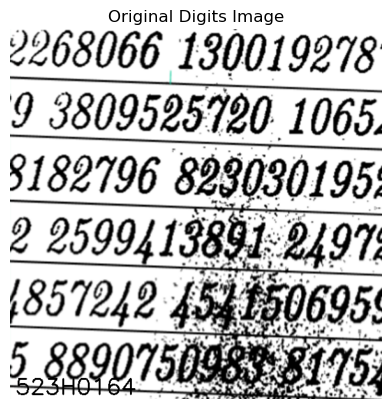

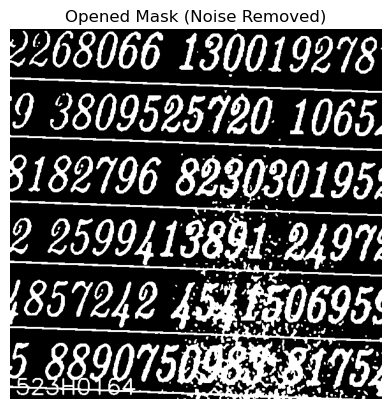

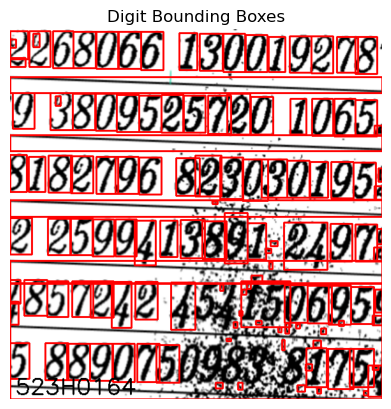

In [15]:
# Load the original and grayscale images
img_digits_color = cv2.imread('digits.png')
img_digits_gray = cv2.cvtColor(img_digits_color, cv2.COLOR_BGR2GRAY)

# Step 1: Inverse thresholding (to get white digits on a black background)
_, mask_digits = cv2.threshold(img_digits_gray, 128, 255, cv2.THRESH_BINARY_INV)

# Step 2: Use opening to remove noise
# A small kernel is used to avoid merging adjacent digits
kernel_digits = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened_mask = cv2.morphologyEx(mask_digits, cv2.MORPH_OPEN, kernel_digits, iterations=1)

# Step 3: Find contours and draw bounding boxes
contours_digits, _ = cv2.findContours(opened_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_ex3 = img_digits_color.copy()
for cnt in contours_digits:
    # Filter out very small contours (which might be noise)
    if cv2.contourArea(cnt) > 15:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output_ex3, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the steps and the final result
display_image(img_digits_color, title="Original Digits Image")
display_image(opened_mask, title="Opened Mask (Noise Removed)")
display_image(output_ex3, title="Digit Bounding Boxes")

### Homework

- Improve the results of exercises 2 and 3 by experimenting with different kernel sizes and morphological operations (closing, erosion, ...).
- Explore "Hand detection and finger counting" applications.

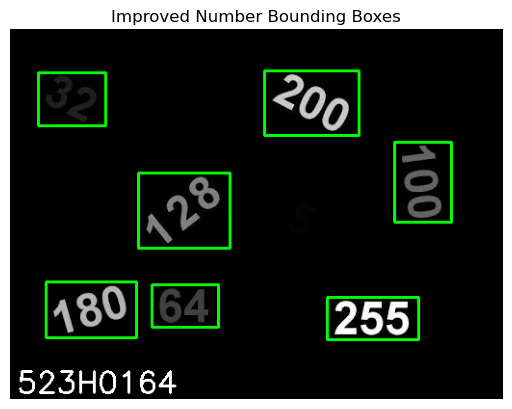

In [16]:
# --- Improved Code for Ex 4.2 ---
import cv2
import numpy as np

# Load images
img_numbers_color = cv2.imread('numbers.png')
img_numbers_gray = cv2.cvtColor(img_numbers_color, cv2.COLOR_BGR2GRAY)

# Step 1: Threshold to create a binary mask
_, mask = cv2.threshold(img_numbers_gray, 30, 255, cv2.THRESH_BINARY)

# Step 2: Use more aggressive dilation
# We increase iterations to 2 to ensure all digits connect.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
# Applying dilation twice makes the connection stronger
dilated_mask = cv2.dilate(mask, kernel, iterations=2)

# Step 3: Find contours and draw bounding boxes
contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_ex2_improved = img_numbers_color.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output_ex2_improved, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the improved result
display_image(output_ex2_improved, title="Improved Number Bounding Boxes")

In [20]:
import numpy as np
import math
import cv2

# Text settings
font = cv2.FONT_HERSHEY_PLAIN
text_color = (255, 255, 255)

# Video Capture
video_path = 'hand_video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Cannot open video file at '{video_path}'")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
h, w = frame_height, frame_width

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = 'finger_count_output.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

print("Processing video... This may take a moment.")

# Define the Region Of Interest (ROI) window
# Adjust these values based on your video dimensions
top_left = (int(w*0.38), int(h*0.1))  # Approximately (245, 50) for 640x480
bottom_right = (int(w*0.9), int(h*0.61))  # Approximately (580, 295) for 640x480

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Optional: Horizontal flip (uncomment if needed)
    # frame = cv2.flip(frame, 1)
    
    # "Paint" (background) with black color this area of the frame
    frame[0:40, w-200:w] = (0)  # Rectangle for text background
    # Add text on screen inside the above black area
    cv2.putText(frame, "Fingers : ", (w-190, 30), font, 2, text_color, 2)
    
    # Draw a rectangle (yellow color) around ROI
    cv2.rectangle(frame, (top_left[0]-5, top_left[1]-5), 
                  (bottom_right[0]+5, bottom_right[1]+5), (0, 255, 255), 3)
    
    # ROI window for the tests (test_window)
    test_window = frame[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    # Apply Gaussian Blur
    test_window_blurred = cv2.GaussianBlur(test_window, (5, 5), 0)
    
    # Transform to HSV format
    hsv = cv2.cvtColor(test_window_blurred, cv2.COLOR_BGR2HSV)
    
    # Create a range for the colors (skin color based on room light, may need to change)
    lower_color = np.array([0, 24, 0])
    upper_color = np.array([179, 255, 255])
    
    # Create a mask
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Find contours inside the ROI
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) > 0:
        # Find the maximum contour each time (on each frame)
        max_contour = max(contours, key=cv2.contourArea)
        
        # Only process if contour area is significant
        if cv2.contourArea(max_contour) > 5000:
            # Draw maximum contour (blue color)
            cv2.drawContours(test_window, [max_contour], -1, (255, 0, 0), 3)
            
            # Find the convex hull "around" the max_contour
            convhull = cv2.convexHull(max_contour, returnPoints=True)
            # Draw convex hull (red color)
            cv2.drawContours(test_window, [convhull], -1, (0, 0, 255), 3, 2)
            
            # Find the minimum y-value of the convexhull
            min_y = h
            final_point = (w, h)
            for i in range(len(convhull)):
                point = (convhull[i][0][0], convhull[i][0][1])
                if point[1] < min_y:
                    min_y = point[1]
                    final_point = point
            # Draw a circle (black color) to the point with the minimum y-value
            cv2.circle(test_window, final_point, 5, (0), 2)
            
            # Find the center of the max contour
            M = cv2.moments(max_contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                # Draw circle (red color) in the center of max contour
                cv2.circle(test_window, (cX, cY), 6, (0, 0, 255), 3)
            
            # Find the polygon with "extreme" points
            contour_poly = cv2.approxPolyDP(max_contour, 0.01*cv2.arcLength(max_contour, True), True)
            
            # Find Defect points - use original contour instead of polygon
            hull = cv2.convexHull(max_contour, returnPoints=False)
            
            if len(max_contour) > 3 and len(hull) > 3:
                try:
                    defects = cv2.convexityDefects(max_contour, hull)
                except cv2.error:
                    defects = None
                
                if defects is not None:
                    count = 0
                    points = []
                    
                    for i in range(defects.shape[0]):
                        start_index, end_index, far_pt_index, fix_dept = defects[i][0]
                        start_pts = tuple(max_contour[start_index][0])
                        end_pts = tuple(max_contour[end_index][0])
                        mid_pts = (int((start_pts[0]+end_pts[0])/2), 
                                  int((start_pts[1]+end_pts[1])/2))
                        far_pts = tuple(max_contour[far_pt_index][0])
                        
                        points.append(mid_pts)
                        
                        # Connect points with lines
                        cv2.line(test_window, start_pts, end_pts, (0, 255, 0), 2)
                        cv2.line(test_window, start_pts, far_pts, (0, 255, 255), 2)
                        cv2.line(test_window, end_pts, far_pts, text_color, 2)
                        
                        # Calculate distances
                        a = np.sqrt((end_pts[0] - start_pts[0])**2 + 
                                   (end_pts[1] - start_pts[1])**2)
                        b = math.sqrt((far_pts[0] - start_pts[0])**2 + 
                                     (far_pts[1] - start_pts[1])**2)
                        c = math.sqrt((end_pts[0] - far_pts[0])**2 + 
                                     (end_pts[1] - far_pts[1])**2)
                        
                        # Avoid division by zero
                        if b * c == 0:
                            continue
                        
                        # Find angle
                        angle = math.acos((b**2 + c**2 - a**2) / (2*b*c))
                        
                        # If angle <= 90 degrees, count as a finger
                        if angle <= np.pi/2:
                            count += 1
                            frame[0:40, w-40:w] = (0)
                            for c_num in range(5):
                                if count == c_num:
                                    cv2.putText(frame, str(count+1), (w-35, 30), 
                                              font, 2, text_color, 2)
                    
                    # If only one point or less, show 1 finger
                    if len(points) <= 1:
                        frame[0:40, w-40:w] = (0)
                        cv2.putText(frame, "1", (w-35, 30), font, 2, text_color, 2)
    
    # Write the processed frame to output
    out.write(frame)
    
    # Allow early exit with 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

print(f"Processing finished. Video saved to '{output_path}'")
cap.release()
out.release()
cv2.destroyAllWindows()

Processing video... This may take a moment.
Processing finished. Video saved to 'finger_count_output.mp4'
